#Задание 1. Создание GIF

In [ ]:
!pip install Pillow
from PIL import Image
from IPython.display import display
from IPython.display import Image as gif
import requests
from io import BytesIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
frames = [ ]

for i in range(1, 16): # запись всех кадров в массив
  res = requests.get('https://dima.hostfl.ru/frame ' + str(i))
  frames.append(Image.open(BytesIO(res.content)).resize((512, 410)))

In [ ]:
frames[0].save(
  'scream.gif',
  append_images=frames[1:],
  save_all=True,
  optimize=True,
  duration=110,
  loop=0
)

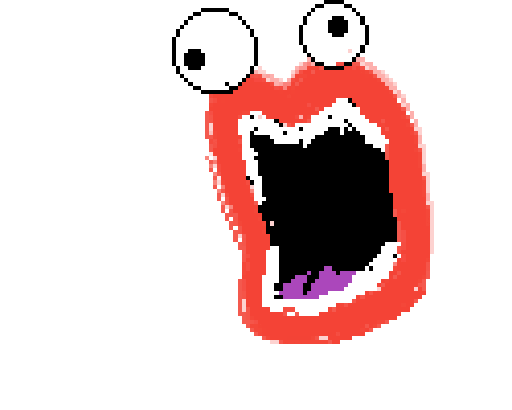

In [ ]:
gif(open('scream.gif', 'rb').read())

#Задание 2. Создание SVG

In [ ]:
!pip install drawSvg
import drawSvg as svg

In [ ]:
# фон
canvas = svg.Drawing(110, 110, origin='center', displayInline=False, fill="#ffffff")

# база
canvas.append(svg.Circle(0, 0, 55, fill='#f5c237', stroke_width=0))
canvas.append(svg.Circle(0, 2.5, 50, fill='#f5d659', stroke_width=0))

# рот
mouth = svg.Circle(0, -25, 15.8, fill='#733701', stroke_width=1, stroke="#733701")
canvas.append(mouth)

# глаза
def drawCross(originX, originY, width, fill, stroke):
  canvas.append(svg.Lines(originX+20, originY+20+width, originX+20+width, originY+20, originX+width, originY, originX, originY+width, fill=fill, close=True, sroke=stroke))
  canvas.append(svg.Lines(originX+20, originY, originX+20+width, originY+width, originX+width, originY+20+width, originX, originY+20, fill=fill, close=True, sroke=stroke))

drawCross(10, -2, 3.5, '#7a4001', "#733701")
drawCross(-30, -2, 3.5, '#7a4001', "#733701")

# брови (не осилил такие же скругления краёв, как в примере)
eyebrow1 = svg.Path(stroke="#733701", stroke_width=4, fill="#f5d659")
eyebrow1.M(-35, 28)
eyebrow1.C(-35, 32, -20, 39, -10, 37)

eyebrow2 = svg.Path(stroke="#733701", stroke_width=4, fill="#f5d659")
eyebrow2.M(35, 28)
eyebrow2.C(35, 32, 20, 39, 10, 37)

canvas.append(eyebrow1)
canvas.append(eyebrow2)

In [ ]:
canvas.setPixelScale(2)

canvas

#Задание 3. Анимация SVG
Как поставить кривую времени (временную функцию) на анимацию? Не смог об этом ничего найти...

In [ ]:
# рот
openMouth = svg.AnimateTransform('scale', '2s', '1,1; 1,1.03; 1,1.1; 1,1.03; 1,1;', repeatCount='indefinite')
liftMouth = svg.Animate('cy', '2s', '22; 22.2; 22.8; 23; 22.8; 22.2; 22;', repeatCount='indefinite')
mouth.appendAnim(openMouth)
mouth.appendAnim(liftMouth)

# брови
# почему-то я не могу прикрепить одну анимацию `raiseEyebrow` к двум объектам
raiseEyebrow1 = svg.AnimateTransform('translate','2s', '0,0; 0,0; 0,-9; 0,-9.3; 0,-9; 0,0; 0,0;', repeatCount='indefinite')
raiseEyebrow2 = svg.AnimateTransform('translate','2s', '0,0; 0,0; 0,-9; 0,-9.3; 0,-9; 0,0; 0,0;', repeatCount='indefinite')
eyebrow1.appendAnim(raiseEyebrow1)
eyebrow2.appendAnim(raiseEyebrow2)

canvas.setPixelScale(2)
canvas